<a href="https://colab.research.google.com/github/The19146267/AI/blob/main/Trai_cay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Fruit'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Fruit'

In [5]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 100 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [6]:
train_dataset.class_indices

{'Bo': 0,
 'Buoi': 1,
 'Cam': 2,
 'Chuoi': 3,
 'Dua': 4,
 'Le': 5,
 'Nho': 6,
 'Oi': 7,
 'Tao': 8,
 'Xoai': 9}

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [9]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
10/10 [==============================] - 44s 3s/step - loss: 2.4136 - accuracy: 0.0700 - val_loss: 2.2845 - val_accuracy: 0.1600
Epoch 2/50
10/10 [==============================] - 3s 327ms/step - loss: 2.3536 - accuracy: 0.1200 - val_loss: 2.2784 - val_accuracy: 0.1300
Epoch 3/50
10/10 [==============================] - 3s 351ms/step - loss: 2.2829 - accuracy: 0.1500 - val_loss: 2.2359 - val_accuracy: 0.2100
Epoch 4/50
10/10 [==============================] - 3s 337ms/step - loss: 2.2254 - accuracy: 0.2400 - val_loss: 2.1707 - val_accuracy: 0.3100
Epoch 5/50
10/10 [==============================] - 3s 349ms/step - loss: 2.1760 - accuracy: 0.2500 - val_loss: 2.0605 - val_accuracy: 0.4000
Epoch 6/50
10/10 [==============================] - 3s 350ms/step - loss: 2.0654 - accuracy: 0.3700 - val_loss: 1.8432 - val_accuracy: 0.5100
Epoch 7/50
10/10 [==============================] - 3s 346ms/step - loss: 1.8743 - accuracy: 0.3600 - val_loss: 1.5811 - val_accuracy: 0.4800
Epoch 8/

In [11]:
model.save('/content/drive/MyDrive/Fruit.h5')

In [12]:
classificationFood_model = load_model('/content/drive/MyDrive/Fruit.h5')

In [13]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

10/10 [==============================] - 2s 149ms/step - loss: 0.0027 - accuracy: 1.0000
Test loss =  0.0027224686928093433
Test accuracy =  1.0


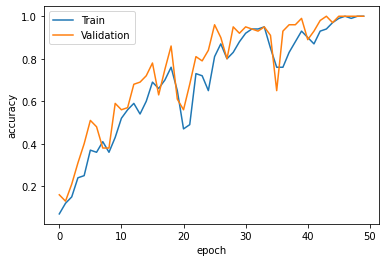

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  Dua


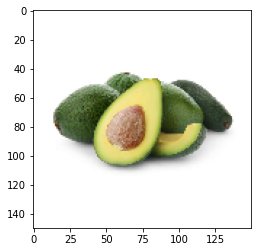

In [15]:
img = load_img('/content/drive/MyDrive/Fruit/PredictFruit/bo10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Tao',
 'Cam',
 'Buoi',
 'Le',
 'Xoai',
 'Chuoi',
 'Nho',
 'Dua',
 'Oi',
 'Bo']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Le


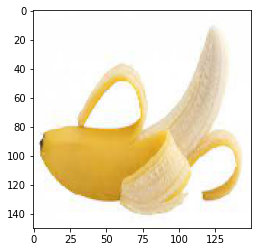

In [16]:
img = load_img('/content/drive/MyDrive/Fruit/PredictFruit/chuoi10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Tao',
 'Cam',
 'Buoi',
 'Le',
 'Xoai',
 'Chuoi',
 'Nho',
 'Dua',
 'Oi',
 'Bo']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Dua


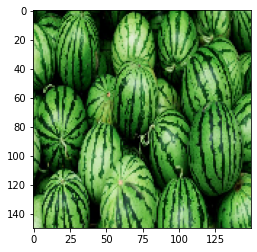

In [17]:
img = load_img('/content/drive/MyDrive/Fruit/PredictFruit/dua10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Tao',
 'Cam',
 'Buoi',
 'Le',
 'Xoai',
 'Chuoi',
 'Nho',
 'Dua',
 'Oi',
 'Bo']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Nho


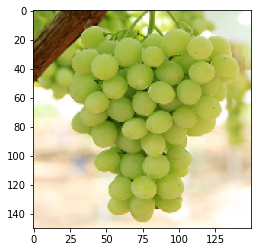

In [18]:
img = load_img('/content/drive/MyDrive/Fruit/PredictFruit/nho10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Tao',
 'Cam',
 'Buoi',
 'Le',
 'Xoai',
 'Chuoi',
 'Nho',
 'Dua',
 'Oi',
 'Bo']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  Dua


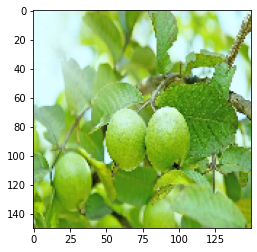

In [19]:
img = load_img('/content/drive/MyDrive/Fruit/PredictFruit/oi10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Tao',
 'Cam',
 'Buoi',
 'Le',
 'Xoai',
 'Chuoi',
 'Nho',
 'Dua',
 'Oi',
 'Bo']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])